<a href="https://colab.research.google.com/github/kundajelab/label_shift_experiments/blob/master/LabelShiftSlideFigures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


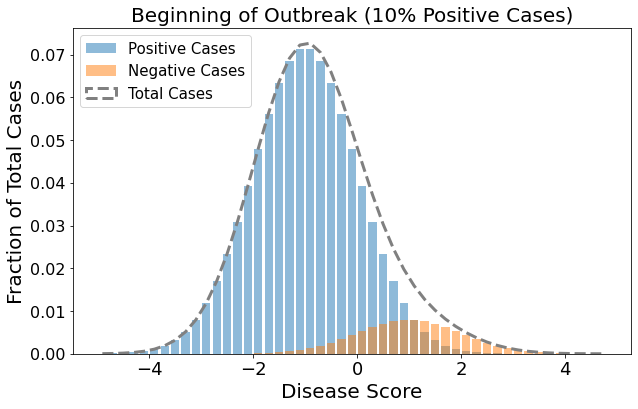

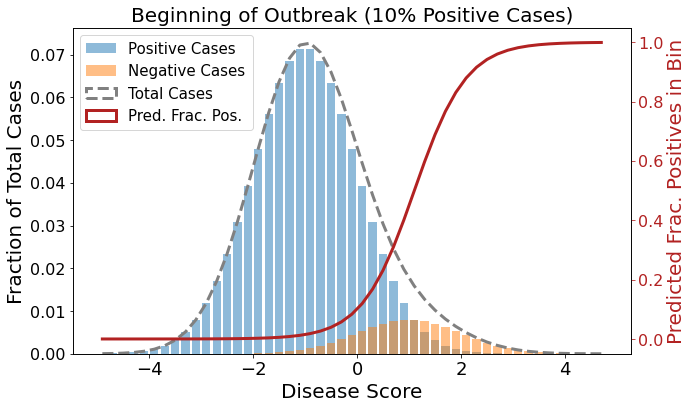

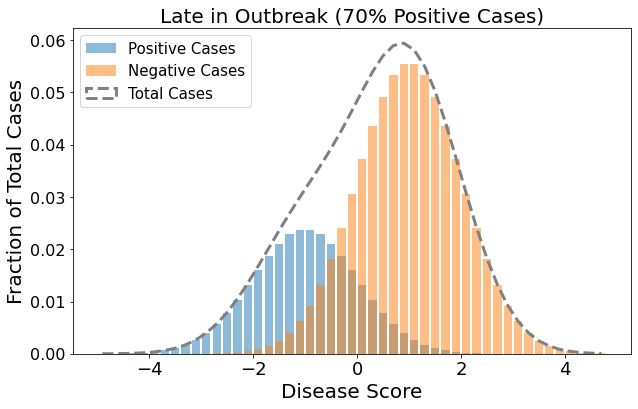

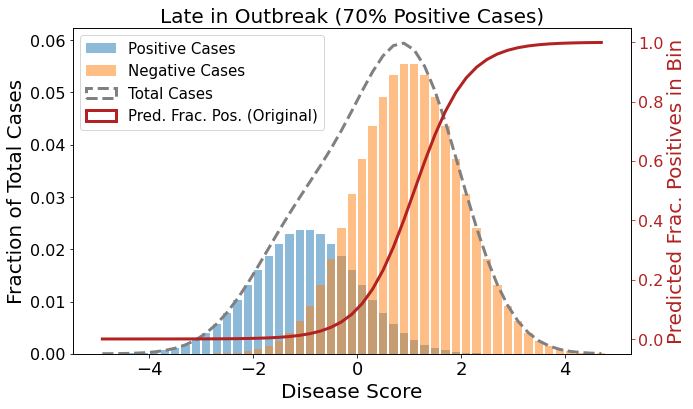

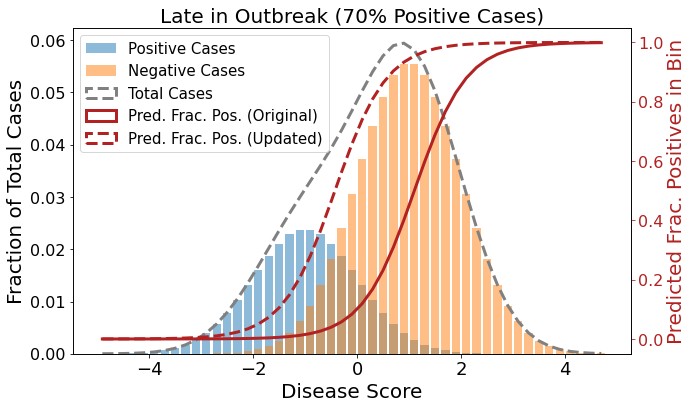

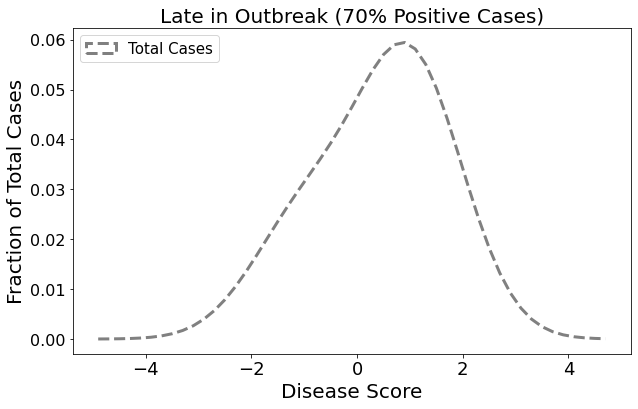

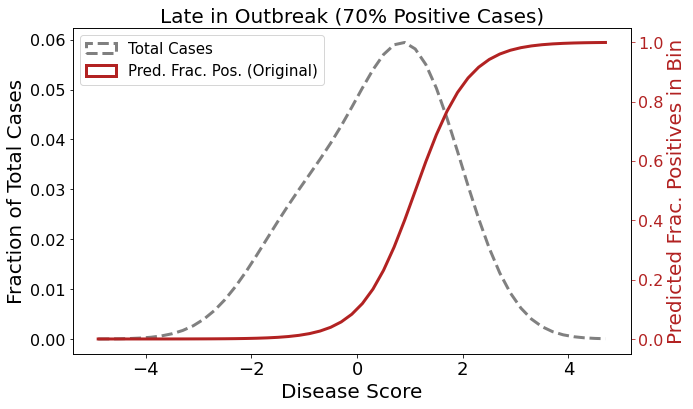

In [155]:
import matplotlib.patches as mpatches

font = {'weight' : 'normal'}
matplotlib.rc('font', **font)
TICKLABEL_SIZE=16
AXLABEL_SIZE=20
AX2_COLOR="firebrick"
TITLE_SIZE=20
LEGEND_FONTSIZE=15

ORIG_POS_FRAC = 0.1
LATE_POS_FRAC = 0.7
negdist = scipy.stats.norm(-1, 1)
posdist = scipy.stats.norm(1, 1)
BUCKET_WIDTH = 0.2
buckets = np.arange(-5, 5, bucket_width)
midpoints = (buckets[0:-1] + buckets[1:])/2
negcdfs = np.array([negdist.cdf(x) for x in buckets])
poscdfs = np.array([posdist.cdf(x) for x in buckets])
orig_negprobs = (negcdfs[1:] - negcdfs[:-1])*(1-ORIG_POS_FRAC)
orig_posprobs = (poscdfs[1:] - poscdfs[:-1])*ORIG_POS_FRAC
late_negprobs = (negcdfs[1:] - negcdfs[:-1])*(1-LATE_POS_FRAC)
late_posprobs = (poscdfs[1:] - poscdfs[:-1])*LATE_POS_FRAC

def barplot(ax, midpoints, probs, **kwargs):
  return ax.bar(midpoints, probs, width=BUCKET_WIDTH*0.8, alpha=0.5, **kwargs)

def lineplot(ax, x, y, linestyle="-", linewidth=3, **kwargs):
  ax.plot(x, y, linestyle=linestyle, linewidth=linewidth, **kwargs)
  #patch_kwargs = dict(kwargs.items())
  return mpatches.Patch(edgecolor=kwargs['color'],
                        facecolor="white", linestyle=linestyle,
                        linewidth=linewidth)

def fracposplot(ax, midpoints, posprobs, negprobs, **kwargs):
  return lineplot(ax=ax, x=midpoints, y=posprobs/(posprobs+negprobs),
                  color=AX2_COLOR, **kwargs)

def configure_ax1(ax):
  ax.tick_params(axis='y', labelsize=TICKLABEL_SIZE)
  ax.set_ylabel("Fraction of Total Cases", fontsize=AXLABEL_SIZE)
  ax.set_xlabel("Disease Score", fontsize=AXLABEL_SIZE)

def configure_ax2(ax):
  ax.tick_params(axis='y', colors=AX2_COLOR,
                labelsize=TICKLABEL_SIZE)
  ax.set_ylabel("Predicted Frac. Positives in Bin", color=AX2_COLOR,
               fontsize=AXLABEL_SIZE)
  
def early_title():
  plt.title("Beginning of Outbreak ("
             +str(int(ORIG_POS_FRAC*100))+"% Positive Cases)",
             fontsize=TITLE_SIZE)

def late_title():
  plt.title("Late in Outbreak ("
             +str(int(LATE_POS_FRAC*100))+"% Positive Cases)",
             fontsize=TITLE_SIZE)

fig, ax1 = plt.subplots(figsize=(10,6))
handles = []
handles.append(barplot(ax1, midpoints, orig_negprobs))
handles.append(barplot(ax1, midpoints, orig_posprobs))
handles.append(lineplot(ax1, midpoints, orig_negprobs+orig_posprobs,
                        color="grey", linestyle="--"))
configure_ax1(ax1)
plt.legend(handles, ["Positive Cases", "Negative Cases", "Total Cases"],
           fontsize=LEGEND_FONTSIZE, loc=2)
early_title()
plt.show()

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
handles = []
handles.append(barplot(ax1, midpoints, orig_negprobs))
handles.append(barplot(ax1, midpoints, orig_posprobs))
handles.append(lineplot(ax1, midpoints, orig_negprobs+orig_posprobs,
                        color="grey", linestyle="--"))
handles.append(fracposplot(ax2, midpoints, orig_posprobs, orig_negprobs))
configure_ax1(ax1)
configure_ax2(ax2)
plt.legend(handles, ["Positive Cases", "Negative Cases",
                     "Total Cases", "Pred. Frac. Pos. "],
           fontsize=LEGEND_FONTSIZE, loc=2)
early_title()
plt.show()

fig, ax1 = plt.subplots(figsize=(10,6))
handles = []
handles.append(barplot(ax1, midpoints, late_negprobs))
handles.append(barplot(ax1, midpoints, late_posprobs))
handles.append(lineplot(ax1, midpoints, late_negprobs+late_posprobs,
                        color="grey", linestyle="--"))
configure_ax1(ax1)
plt.legend(handles, ["Positive Cases", "Negative Cases", "Total Cases"],
           fontsize=LEGEND_FONTSIZE, loc=2)
late_title()
plt.show()

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
handles = []
handles.append(barplot(ax1, midpoints, late_negprobs))
handles.append(barplot(ax1, midpoints, late_posprobs))
handles.append(lineplot(ax1, midpoints, late_negprobs+late_posprobs,
                        color="grey", linestyle="--"))
handles.append(fracposplot(ax2, midpoints, orig_posprobs, orig_negprobs))
configure_ax1(ax1)
configure_ax2(ax2)
plt.legend(handles, ["Positive Cases", "Negative Cases",
                     "Total Cases",
                     "Pred. Frac. Pos. (Original)"],
           fontsize=LEGEND_FONTSIZE, loc=2)
late_title()
plt.show()

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
handles = []
handles.append(barplot(ax1, midpoints, late_negprobs))
handles.append(barplot(ax1, midpoints, late_posprobs))
handles.append(lineplot(ax1, midpoints, late_negprobs+late_posprobs,
                        color="grey", linestyle="--"))
handles.append(fracposplot(ax2, midpoints, orig_posprobs,
                           orig_negprobs))
handles.append(fracposplot(ax2, midpoints, late_posprobs,
                           late_negprobs, linestyle="--"))
configure_ax1(ax1)
configure_ax2(ax2)
plt.legend(handles, ["Positive Cases", "Negative Cases",
                     "Total Cases",
                     "Pred. Frac. Pos. (Original)",
                     "Pred. Frac. Pos. (Updated)"],
           fontsize=LEGEND_FONTSIZE, loc=2)
late_title()
plt.show()


fig, ax1 = plt.subplots(figsize=(10,6))
handles = []
handles.append(lineplot(ax1, midpoints, late_negprobs+late_posprobs,
                       color="grey", linestyle="--"))
configure_ax1(ax1)
plt.legend(handles, ["Total Cases"],
           fontsize=LEGEND_FONTSIZE, loc=2)
late_title()
plt.show()


fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
handles = []
handles.append(lineplot(ax1, midpoints, late_negprobs+late_posprobs,
                       color="grey", linestyle="--"))
handles.append(fracposplot(ax2, midpoints, orig_posprobs,
                           orig_negprobs))
configure_ax1(ax1)
configure_ax2(ax2)
plt.legend(handles, ["Total Cases",
                     "Pred. Frac. Pos. (Original)"],
           fontsize=LEGEND_FONTSIZE, loc=2)
late_title()
plt.show()

In [83]:
posprobs.shape

(49,)

In [0]:
def generateData(ratio, total):
    p = int(ratio*total)
    n = total-p
    E_neg = []
    E_pos = []
    E_por_pos = []
    for idx, point in enumerate(midpoints):
        E_neg.append(negprobs[idx]*n)
        E_pos.append(posprobs[idx]*p)
        E_por_pos.append(E_pos[-1]/(E_neg[-1]+E_pos[-1]))
    return E_neg, E_pos, E_por_pos

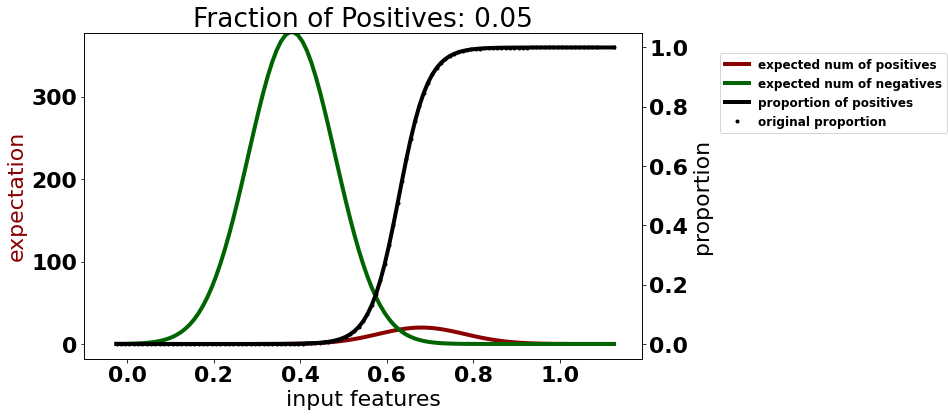

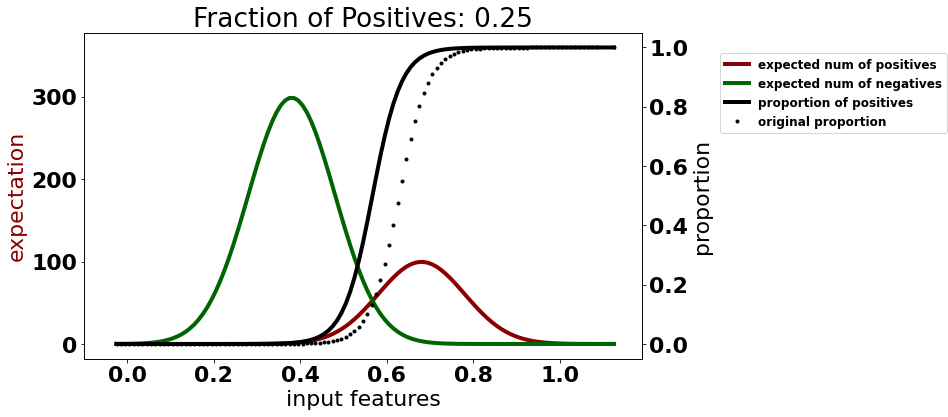

In [6]:
font = {'weight' : 'bold', 'size'   : 22}
matplotlib.rc('font', **font)

base_ratio = 0.05
_, _, E_por_const = generateData(ratio=base_ratio, total=10000)

def plot_for_ratio(ratio):
  E_neg, E_pos, E_por_pos = generateData(ratio=ratio, total=10000)
  
  fig, ax1 = plt.subplots(figsize=(10,6))
  ax2 = ax1.twinx()
  ax1.set_title("Fraction of Positives: "+"{:.2f}".format(round(ratio, 2)))
  
  ax1.plot(midpoints, E_pos, '-', color='darkred', linewidth=4, label='expected num of positives')
  ax1.plot(midpoints, E_neg, '-', color='darkgreen', linewidth=4, label='expected num of negatives')
  ax2.plot(midpoints, E_por_pos, '-', color='black', linewidth=4, label='proportion of positives')
  ax2.plot(midpoints, E_por_const, '.', color='black', linewidth=4, label='original proportion')
  
  ax1.set_xlabel('input features')
  ax1.set_ylabel('expectation', color='darkred')
  ax2.set_ylabel('proportion', color='black')
  ax1.set_xlim(-0.1, 1.19)
  ax1.set_ylim(-18, 378)
  ax2.set_ylim(-0.05, 1.05)
  lgd = fig.legend(bbox_to_anchor=(1, 0.75), loc='center left', borderaxespad=0., prop={'size': 12})
  plt.show()

plot_for_ratio(base_ratio)
plot_for_ratio(0.25)